In [1]:
from plotting_scripts import *

In [3]:
pream = "../data_koelsch/sv"
problems = ['ldc2d', 'bfs2d']


def process_frame(df):
    # Create a copy of the slice to ensure we're not modifying a view.
    df_reduced = df[["order", "ref", "linear_iter", 'KSPSolve(time):Warm', 'ASMPatch(size):Warm', 'ASMPatch(times):Warm']].copy()
    
    # Calculate the new column values safely.
    try:
        df_reduced["(rlx time)/(total runtime)"] = df_reduced["ASMPatch(times):Warm"].apply(lambda x: np.sum(x)) / df_reduced["KSPSolve(time):Warm"]
        df_reduced["rlx(i)/rlx_total"] = df_reduced["ASMPatch(times):Warm"].apply(lambda x: [np.round(num / np.sum(x), 2) for num in x])
    except:
        pass

    df_reduced["(run time)/(total tile)"] = df['SNESSolve(time):Warm']/df['SNESSolve(time):Warm-up']
    
    return df_reduced



# Approximate full-block factorization (AFBF) hmg

In [5]:
afbf_hmg_data =  {}

for problem in problems:
    print(f"{problem}===================================================")
    hmg_data =  {}

    for h_sweeps in range(2,4):
        path    = f'{pream}/afbf_hmg_asmstarpc/{problem}/parallel_p8/V_h{h_sweeps}/results.pkl'
        hmg = get_frame(f'{path}')
        hmg = hmg[hmg['order'] != 2]
        hmg = hmg.reset_index(drop=True)
        name = r'FBF$\left(V^{%s}_{h\textnormal{MG}}\right)$' % rf'\left(\nu_h^s={h_sweeps}\right)'
        hmg_data[name] = hmg

        print(name)
    
    afbf_hmg_data[problem] = hmg_data


hmg

ldc2d===================================================
FBF$\left(V^{\left(\nu_h^s=2\right)}_{h\textnormal{MG}}\right)$
FBF$\left(V^{\left(\nu_h^s=3\right)}_{h\textnormal{MG}}\right)$
bfs2d===================================================
FBF$\left(V^{\left(\nu_h^s=2\right)}_{h\textnormal{MG}}\right)$
FBF$\left(V^{\left(\nu_h^s=3\right)}_{h\textnormal{MG}}\right)$


,order,ref,ncells,ndofs,linear_iter,overall_time(s),warm_time(s),resids,solver_params,StokesSolver:init(count),...,VecScatterBegin(flops):Warm,VecScatterBegin(time):Warm,VecScatterEnd(count):Warm,VecScatterEnd(flops):Warm,VecScatterEnd(time):Warm,ASMPatch(size):Warm,ASMPatch(count):Warm,ASMPatch(times):Warm,ASMPatch(flops):Warm,PatchSizes:Warm
0,3,1,1803,171116,28,13.756008,3.795479,"[47.357408457947756, 0.18708081811332444, 0.00...","{'petscpartitioner_type': 'parmetis', 'petscpa...",1.0,...,0.0,0.383434,488012.0,207060.0,0.232694,[102932],[336.0],[2.7503649274996746],[346684212.0],"[{20: 3788, 30: 5, 42: 212, 62: 51, 74: 1687, ..."
1,3,2,6472,683150,27,41.135542,17.677959,"[67.05597121914577, 0.2647401376925911, 0.0050...","{'petscpartitioner_type': 'parmetis', 'petscpa...",2.0,...,0.0,2.023997,2492613.0,555903.0,1.229343,"[137678, 410414]","[324.0, 324.0]","[3.464351073500552, 10.547109480248366]","[446932161.0, 1339624656.0]","[{18: 5, 24: 430, 32: 51, 38: 7260, 44: 48, 36..."
2,3,3,24336,2729978,27,167.385713,71.766646,"[94.87406137901398, 0.3749746089044616, 0.0031...","{'petscpartitioner_type': 'parmetis', 'petscpa...",3.0,...,0.0,8.928076,10524276.0,1266435.0,4.468861,"[137678, 548090, 1639034]","[324.0, 324.0, 324.0]","[3.4872443741248276, 13.954705117999708, 42.19...","[446932161.0, 1788572583.0, 5363377578.0]","[{18: 5, 24: 430, 32: 51, 38: 7260, 44: 48, 36..."
3,4,1,1803,296338,26,14.848779,5.103512,"[65.26132090632038, 0.14238519016243922, 0.007...","{'petscpartitioner_type': 'parmetis', 'petscpa...",4.0,...,0.0,0.436564,453154.0,383994.0,0.256850,[182698],[312.0],[3.099324549251037],[972889398.0],"[{38: 3788, 56: 5, 80: 212, 122: 51, 146: 1687..."
4,4,2,6472,1183602,25,57.997360,23.817840,"[92.32920307684046, 0.2008017622767504, 0.0040...","{'petscpartitioner_type': 'parmetis', 'petscpa...",5.0,...,0.0,2.335655,2307975.0,1028475.0,1.241364,"[244178, 729042]","[300.0, 300.0]","[4.027415775002964, 11.99129581849877]","[1248153525.0, 3745160100.0]","[{32: 5, 44: 430, 62: 51, 74: 7260, 86: 48, 68..."
5,4,3,24336,4730914,25,225.658379,93.236411,"[130.59296672866589, 0.284102393296483, 0.0025...","{'petscpartitioner_type': 'parmetis', 'petscpa...",6.0,...,0.0,10.032555,9744700.0,2343825.0,4.775894,"[244178, 973218, 2912674]","[300.0, 300.0, 300.0]","[3.9867202828723407, 16.05579650087725, 46.738...","[1248153525.0, 4995241875.0, 14987167650.0]","[{32: 5, 44: 430, 62: 51, 74: 7260, 86: 48, 68..."
6,5,1,1072,244642,26,15.038590,4.236654,"[75.58372079307922, 0.12173828319053051, 0.008...","{'petscpartitioner_type': 'parmetis', 'petscpa...",7.0,...,0.0,0.264961,245440.0,480948.0,0.195177,[153202],[312.0],[2.232150470874217],[1216508046.0],"[{62: 2032, 90: 5, 130: 151, 202: 38, 210: 1, ..."
7,5,2,3638,976962,25,48.755961,19.158577,"[106.92774673056061, 0.17210280090659527, 0.00...","{'petscpartitioner_type': 'parmetis', 'petscpa...",8.0,...,0.0,1.436623,1245675.0,1294050.0,0.812393,"[204802, 611202]","[300.0, 300.0]","[2.8646563477499285, 8.453997430374386]","[1560725775.0, 4683568725.0]","[{50: 5, 70: 311, 102: 38, 110: 1, 122: 3835, ..."
8,5,3,13328,3904642,25,184.554835,76.782946,"[151.2374235391684, 0.24368939987507446, 0.002...","{'petscpartitioner_type': 'parmetis', 'petscpa...",9.0,...,0.0,6.200515,5245150.0,2955900.0,3.230918,"[204802, 816002, 2441602]","[300.0, 300.0, 300.0]","[2.8633927146240694, 11.2408779197483, 33.3602...","[1560725775.0, 6246859575.0, 18743441625.0]","[{50: 5, 70: 311, 102: 38, 110: 1, 122: 3835, ..."
9,6,1,793,190850,26,17.239627,3.810609,"[83.64105199067208, 0.10160208742362727, 0.009...","{'petscpartitioner_type': 'parmetis', 'petscpa...",10.0,...,0.0,0.181626,136084.0,489450.0,0.214583,[120794],[312.0],[1.816171721375099],[1326651768.0],"[{92: 1112, 192: 107, 302: 14, 362: 474, 422: ..."


# Approximate full-block factorization (AFBF) Direct

ldc2d===================================================


,order,ref,ndofs,linear_iter,SNESSolve(time):Warm,SolvePartial,Check
0,3,1,243986,25,6.225160,5.759642,pass
1,3,2,974690,25,26.268556,25.164323,pass
2,3,3,3896258,24,99.184363,96.617969,pass
3,4,1,250242,23,4.236816,3.807745,pass
4,4,2,999682,23,17.884459,16.677763,pass
5,4,3,3996162,22,67.970768,64.005138,pass
6,5,1,246402,23,3.468350,3.177133,pass
7,5,2,984322,23,14.110812,13.385088,pass
8,5,3,3934722,22,51.841087,50.879184,pass
9,6,1,231818,22,3.135829,2.849393,pass


,order,ref,ndofs,linear_iter,SNESSolve(time):Warm,SolvePartial,Check
0,3,1,243986,25,7.080191,6.649534,pass
1,3,2,974690,25,31.746920,30.79826,pass
2,3,3,3896258,24,125.395099,122.270079,pass
3,4,1,250242,23,4.885584,4.446864,pass
4,4,2,999682,23,21.269385,20.000197,pass
5,4,3,3996162,22,82.074711,77.912525,pass
6,5,1,246402,23,3.875966,3.58229,pass
7,5,2,984322,23,16.211327,15.480634,pass
8,5,3,3934722,22,59.925916,58.888915,pass
9,6,1,231818,22,3.273769,2.996215,pass


,order,ref,ndofs,linear_iter,SNESSolve(time):Warm,SolvePartial,Check
0,3,1,243986,22,6.616136,6.104035,pass
1,3,2,974690,21,26.164839,25.246065,pass
2,3,3,3896258,20,99.477789,96.773333,pass
3,4,1,250242,19,4.170331,3.846537,pass
4,4,2,999682,19,17.322338,16.449064,pass
5,4,3,3996162,18,68.095423,64.783161,pass
6,5,1,246402,19,3.801417,3.354283,pass
7,5,2,984322,19,14.398465,13.754425,pass
8,5,3,3934722,19,55.164165,54.150366,pass
9,6,1,231818,18,3.287405,2.957738,pass


,order,ref,ndofs,linear_iter,SNESSolve(time):Warm,SolvePartial,Check
0,3,1,243986,21,7.696857,7.2676,pass
1,3,2,974690,20,30.069328,29.139786,pass
2,3,3,3896258,20,121.269181,118.141881,pass
3,4,1,250242,19,4.919120,4.402783,pass
4,4,2,999682,19,19.802918,18.94831,pass
5,4,3,3996162,18,75.435440,73.099392,pass
6,5,1,246402,19,3.979746,3.657966,pass
7,5,2,984322,19,16.149628,15.417321,pass
8,5,3,3934722,18,59.031657,57.993722,pass
9,6,1,231818,18,3.360418,3.08801,pass


,order,ref,ndofs,linear_iter,SNESSolve(time):Warm,SolvePartial,Check
0,3,1,243986,25,9.087504,8.259023,pass
1,3,2,974690,25,38.691639,37.492848,pass
2,3,3,3896258,24,162.726158,155.295472,pass
3,4,1,250242,23,5.892346,5.288713,pass
4,4,2,999682,23,25.770191,24.204133,pass
5,4,3,3996162,22,99.346851,94.208536,pass
6,5,1,246402,23,4.514997,4.095626,pass
7,5,2,984322,22,18.071865,17.080937,pass
8,5,3,3934722,22,69.163720,67.896909,pass
9,6,1,231818,21,3.482602,3.155048,pass


,order,ref,ndofs,linear_iter,SNESSolve(time):Warm,SolvePartial,Check
0,3,1,243986,25,11.569694,10.593846,pass
1,3,2,974690,25,54.337864,51.288836,pass
2,3,3,3896258,24,218.753205,207.649396,pass
3,4,1,250242,23,7.095909,6.553301,pass
4,4,2,999682,23,32.413493,31.198617,pass
5,4,3,3996162,22,128.321762,124.132627,pass
6,5,1,246402,23,5.392594,4.893511,pass
7,5,2,984322,22,24.025623,22.376463,pass
8,5,3,3934722,22,91.678501,87.77053,pass
9,6,1,231818,21,3.954923,3.611006,pass


,order,ref,ndofs,linear_iter,SNESSolve(time):Warm,SolvePartial,Check
0,3,1,243986,21,8.221126,7.719265,pass
1,3,2,974690,20,37.466298,35.419172,pass
2,3,3,3896258,19,146.265742,139.15645,pass
3,4,1,250242,19,5.418676,4.955054,pass
4,4,2,999682,18,21.848867,20.864328,pass
5,4,3,3996162,17,83.100616,80.494286,pass
6,5,1,246402,19,4.959833,4.354885,pass
7,5,2,984322,18,17.945657,16.881154,pass
8,5,3,3934722,18,69.958111,67.262069,pass
9,6,1,231818,18,3.800559,3.444554,pass


Relative cost per run
Name                                                                                                           : k>=5   | k>2   
FBF$\left(V^{\left(n_V=1,\nu_p=\nu_h^s=2\right)}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$   : 328.29 | 619.48
FBF$\left(V^{\left(n_V=1,\nu_p=2,\nu_h^s=3\right)}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$ : 349.89 | 702.36
FBF$\left(V^{\left(n_V=1,\nu_p=3,\nu_h^s=2\right)}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$ : 363.41 | 658.63
FBF$\left(V^{\left(n_V=1,\nu_p=\nu_h^s=3\right)}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$   : 367.46 | 705.81
FBF$\left(V^{\left(n_V=2,\nu_p=\nu_h^s=2\right)}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$   : 373.42 | 806.69
FBF$\left(V^{\left(n_V=2,\nu_p=3,\nu_h^s=2\right)}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$ : 394.26 | 789.45
FBF$\left(V^{\left(n_V=2,\nu_p=2,\nu_h^s=3\right)}_{ph\textnormal{MG}\left(

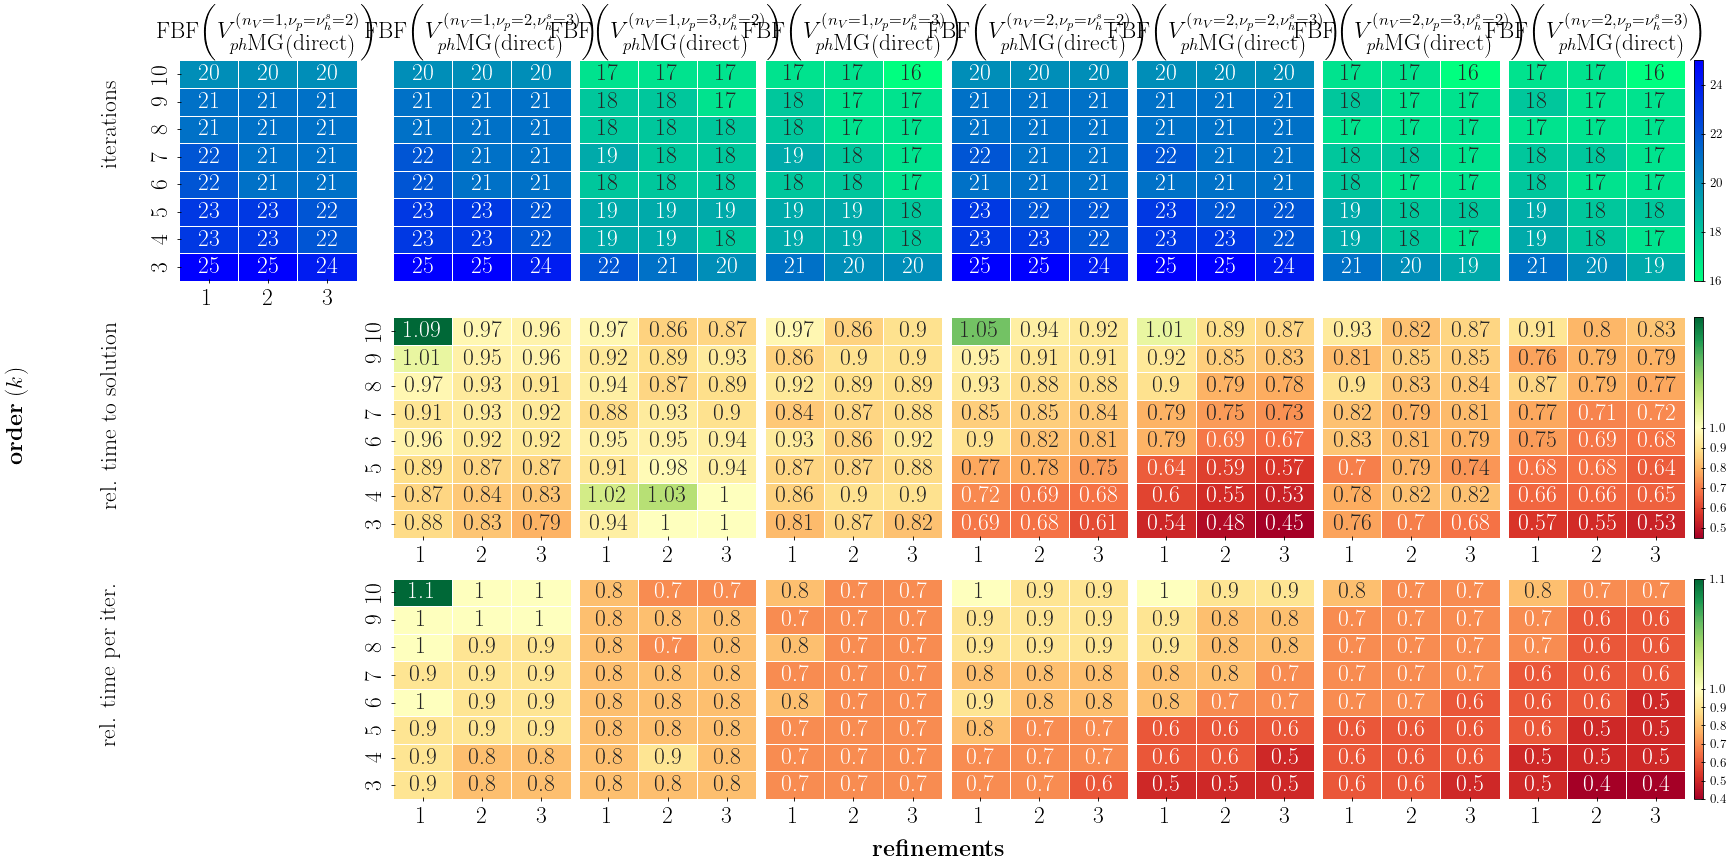

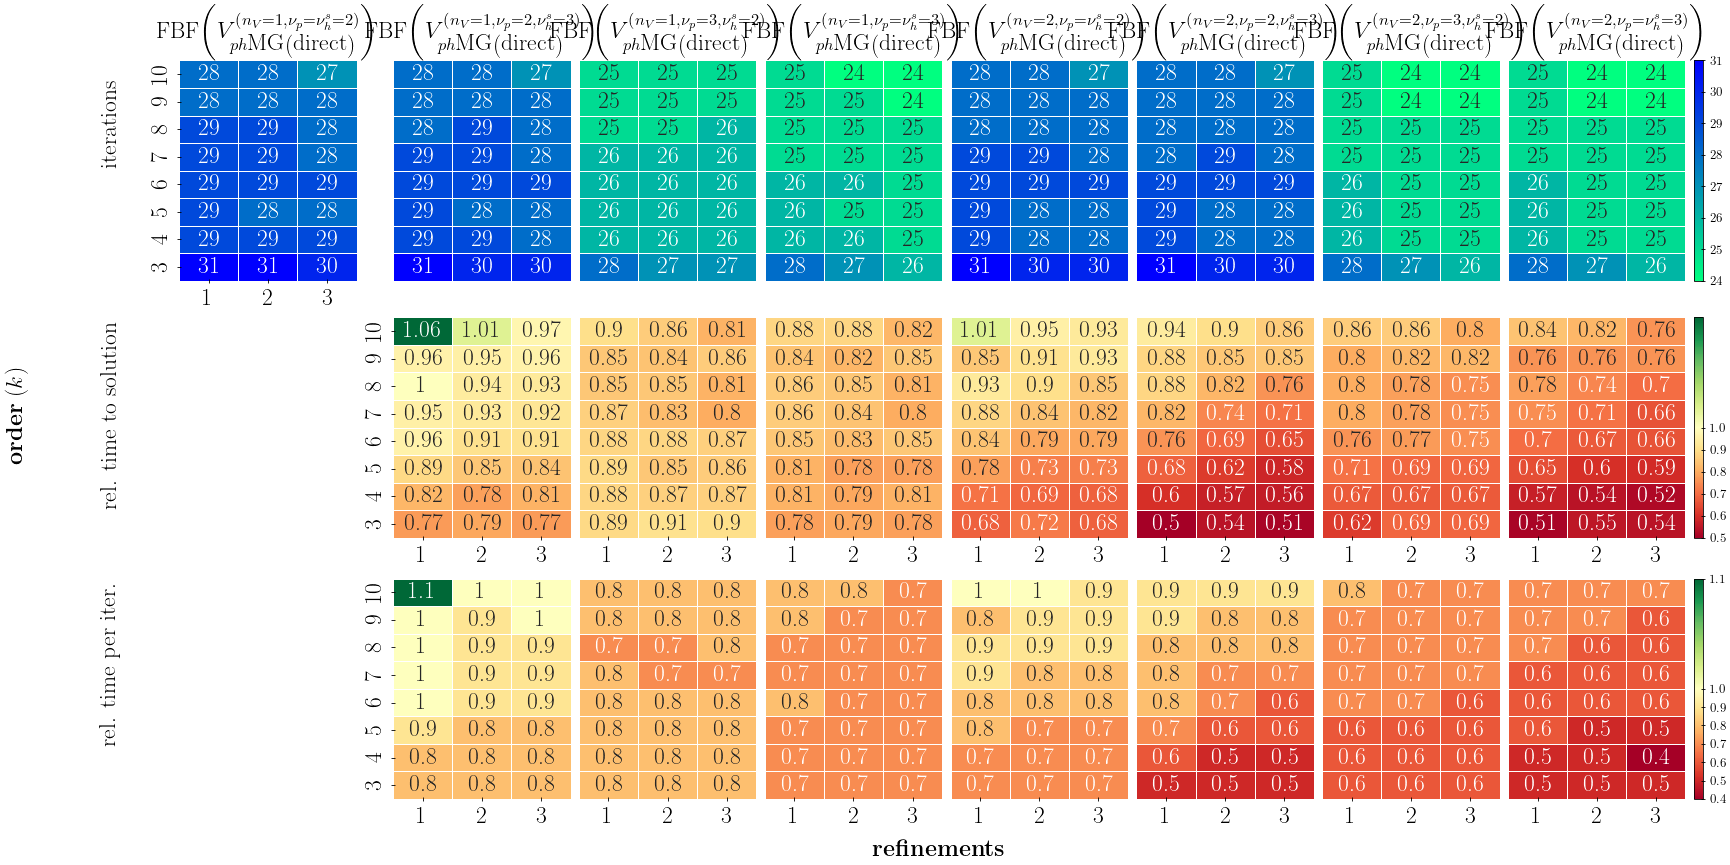

In [7]:
afbf_direct_data =  {}

for problem in problems:
    print(f"{problem}===================================================")
    phmg_data =  {}

    for h_cycles in range(1,3):
        for p_sweeps, h_sweeps in [(2,2), (2,3), (3,2), (3,3), #(3,4), (4,3), (4,4)
                                  ]:
            path    = f'{pream}/afbf_phmg_asmstarpc/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'
            try:
                phmg = get_frame(f'{path}')
            except:
                pass
            phmg = phmg[phmg['order'] != 2]
            phmg = phmg.reset_index(drop=True)
            if p_sweeps == h_sweeps:
                name = r'FBF$\left(V^{%s}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$' % rf'\left(n_V={h_cycles},\nu_p=\nu_h^s={p_sweeps}\right)'
            else:
                name = r'FBF$\left(V^{%s}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$' % rf'\left(n_V={h_cycles},\nu_p={p_sweeps},\nu_h^s={h_sweeps}\right)'

            phmg_data[name] = phmg

    plot_all(phmg_data, warm=True)
    afbf_direct_data[problem] = phmg_data



# Approximate full-block factorization (AFBF) Gradual

In [5]:
# afbf_gradual_data =  {}

# for problem in problems:
#     print(f"{problem}===================================================")
#     phmg_data =  {}
#     for h_cycles in range(1,3):
        
#         for p_sweeps, h_sweeps in [(2,2), (2,3), (3,2), (3,3) #, (3,4), (4,3), (4,4)
#                                   ]:
#             path    = f'{pream}/afbf_grad_patch_pc/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'
#             #path    = f'{pream}/other/afbf/{problem}/parallel_p8/V_p{p_sweeps}_h{h_sweeps}/results.pkl'
#             phmg = get_frame(f'{path}')
#             phmg = phmg[phmg['order'] != 2]
#             phmg = phmg.reset_index(drop=True)

#             if p_sweeps == h_sweeps:
#                 phmg_data[r'$FBF\left(V^{%s}_{phmg\left(gradual\right)}\right)$' % rf'\left(n_V={h_cycles},\nu_p=\nu_h={p_sweeps}\right)'] = phmg
#             else:
#                 phmg_data[r'$FBF\left(V^{%s}_{phmg\left(gradual\right)}\right)$' % rf'\left(n_V={h_cycles},\nu_p={p_sweeps},\nu_h={h_sweeps}\right)'] = phmg
                

#     plot_all(phmg_data)    
#     afbf_gradual_data[problem] = phmg_data


# phMG(direct)

In [6]:
phmg_direct_data =  {}

for problem in problems:
    print(f"{problem}===================================================")
    phmg_data =  {}

    for h_cycles in range(1,3):
        for p_sweeps, h_sweeps in [(2,2), (2,3), (3,2), (3,3), #(3,4), (4,3), (4,4)
                                  ]:
            path    = f'{pream}/phmg/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'
            phmg = get_frame(f'{path}')
            phmg = phmg[phmg['order'] != 2]
            phmg = phmg.reset_index(drop=True)

            if (phmg['linear_iter'] == 120).any():
                continue
    
            if p_sweeps == h_sweeps:
                phmg_data[r'$V^{%s}_{ph\textnormal{MG(direct)}}$' % rf'(n_V={h_cycles},\nu_p=\nu_h^s={p_sweeps})'] = phmg
            else:
                phmg_data[r'$V^{%s}_{ph\textnormal{MG(direct)}}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h^s={h_sweeps})'] = phmg
    
    # print('--')
    # for h_cycles in range(1,3):
    #     for p_sweeps, h_sweeps in [(2,2), (2,3), (3,2), (3,3),# (3,4), (4,3), (4,4)
    #                               ]:
    #         path    = f'{pream}/phmg_onesided/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'
    #         try:
    #             phmg = get_frame(f'{path}')
    #         except:
    #             continue
    #         phmg = phmg[phmg['order'] != 2]
    #         phmg = phmg.reset_index(drop=True)

    #         if (phmg['linear_iter'] == 120).any():
    #             continue
    
    #         phmg_data[r'$V^{%s}_{phmg(direct)}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h^D={2*h_sweeps})'] = phmg
    #         #display(process_frame(phmg))
    

    #plot_all(phmg_data)
    phmg_direct_data[problem] = phmg_data
phmg

ldc2d===================================================
bfs2d===================================================


,order,ref,ncells,ndofs,linear_iter,overall_time(s),warm_time(s),resids,solver_params,StokesSolver:init(count),...,VecScatterBegin(flops):Warm,VecScatterBegin(time):Warm,VecScatterEnd(count):Warm,VecScatterEnd(flops):Warm,VecScatterEnd(time):Warm,ASMPatch(size):Warm,ASMPatch(count):Warm,ASMPatch(times):Warm,ASMPatch(flops):Warm,PatchSizes:Warm
0,3,1,1803,171116,10,6.764670,1.886065,"[47.357408457947756, 0.5779777718743989, 0.027...","{'petscpartitioner_type': 'parmetis', 'petscpa...",4.0,...,0.0,0.228596,261220.0,167970.00,0.251063,"[51686, 171116]","[120.0, 60.0]","[0.8253192527486704, 0.6818348837499002]","[178569300.0, 381334320.0]","[{56: 3788, 80: 5, 116: 212, 182: 51, 218: 168..."
1,3,2,6472,683150,10,24.973391,8.428261,"[67.05597121914577, 0.7400432825670226, 0.0315...","{'petscpartitioner_type': 'parmetis', 'petscpa...",5.0,...,0.0,1.126938,1267405.0,392430.00,1.305573,"[69277, 205645, 683150]","[120.0, 120.0, 60.0]","[1.0633896826249156, 3.327638098625812, 2.8143...","[183052695.0, 715285395.0, 1536485085.0]","[{56: 15152, 80: 5, 116: 430, 182: 51, 218: 72..."
2,3,3,24336,2729978,9,108.441928,30.685354,"[94.87406137901398, 1.023886177799142, 0.04182...","{'petscpartitioner_type': 'parmetis', 'petscpa...",6.0,...,0.0,4.385635,4741276.5,756405.00,4.623833,"[69277, 274919, 820391, 2729978]","[108.0, 108.0, 108.0, 54.0]","[0.9683636521250492, 3.8624060538745084, 11.96...","[164747425.5, 659026246.5, 2569449424.5, 55527...","[{56: 60608, 80: 5, 116: 866, 182: 51, 218: 29..."
3,4,1,1803,296338,11,9.433936,2.860766,"[65.26132090632038, 1.8913591916762194, 0.1407...","{'petscpartitioner_type': 'parmetis', 'petscpa...",7.0,...,0.0,0.289839,287342.0,263109.00,0.402437,"[51686, 296338]","[132.0, 66.0]","[0.9241489772502973, 1.2829197112503152]","[196426230.0, 985417125.0]","[{92: 3788, 130: 5, 190: 212, 302: 51, 362: 16..."
4,4,2,6472,1183602,11,35.382741,11.835783,"[92.32920307684046, 2.3071714197426774, 0.1712...","{'petscpartitioner_type': 'parmetis', 'petscpa...",8.0,...,0.0,1.360659,1394145.5,587532.00,1.641007,"[69277, 205645, 1183602]","[132.0, 132.0, 66.0]","[1.1857990441238258, 3.625271891498585, 5.0244...","[201357964.5, 786813934.5, 3953025598.5]","[{92: 15152, 130: 5, 190: 430, 302: 51, 362: 7..."
5,4,3,24336,4730914,11,164.001572,46.093811,"[130.59296672866589, 3.1353754590957927, 0.227...","{'petscpartitioner_type': 'parmetis', 'petscpa...",9.0,...,0.0,5.787906,5794893.5,1235388.00,5.664747,"[69277, 274919, 820391, 4730914]","[132.0, 132.0, 132.0, 66.0]","[1.1781892322512135, 4.651150186499933, 14.241...","[201357964.5, 805476523.5, 3140438185.5, 15848...","[{92: 60608, 130: 5, 190: 866, 302: 51, 362: 2..."
6,5,1,1072,244642,13,8.039800,2.497335,"[75.58372079307922, 2.5705785440272386, 0.3126...","{'petscpartitioner_type': 'parmetis', 'petscpa...",10.0,...,0.0,0.201828,183800.5,320726.25,0.300098,"[27835, 244642]","[156.0, 78.0]","[0.5828197310003134, 1.3069065757501903]","[124209754.5, 1255220742.75]","[{137: 2032, 192: 5, 282: 151, 452: 38, 462: 1..."
7,5,2,3638,976962,12,27.919959,9.601478,"[106.92774673056061, 3.331618379094064, 0.3841...","{'petscpartitioner_type': 'parmetis', 'petscpa...",11.0,...,0.0,0.865780,820290.0,645192.00,1.264612,"[37379, 110531, 976962]","[144.0, 144.0, 72.0]","[0.6968090475006647, 2.127493808000793, 4.8420...","[117829710.0, 458287650.0, 4652839026.0]","[{137: 8128, 192: 5, 282: 311, 452: 38, 462: 1..."
8,5,3,13328,3904642,12,120.936907,38.131124,"[151.2374235391684, 4.560447034369352, 0.51050...","{'petscpartitioner_type': 'parmetis', 'petscpa...",12.0,...,0.0,3.675682,3401238.0,1343034.00,4.873842,"[37379, 147907, 440515, 3904642]","[144.0, 144.0, 144.0, 72.0]","[0.7072956718743626, 2.7386971433742815, 8.594...","[117829710.0, 471354462.0, 1834966458.0, 18647...","[{137: 32512, 192: 5, 282: 631, 452: 38, 462: ..."
9,6,1,793,190850,15,7.875945,2.397767,"[83.64105199067208, 3.4143451188508562, 0.5395...","{'petscpartitioner_type': 'parmetis', 'petscpa...",13.0,...,0.0,0.141285,11744

# phMG(gradual)

ldc2d===================================================
Relative cost per run
Name                                                         : k>=5   | k>2   
$V^{(n_V=1,\nu_p=\nu_h^s=3)}_{ph\textnormal{MG(gradual)}}$   : 223.48 | 327.75
$V^{(n_V=1,\nu_p=\nu_h^s=2)}_{ph\textnormal{MG(gradual)}}$   : 314.41 | 425.35
$V^{(n_V=1,\nu_p=3,\nu_h^s=2)}_{ph\textnormal{MG(gradual)}}$ : 371.98 | 486.43
Relative cost per iteration
Name                                                         : k>=5   | k>2   
$V^{(n_V=1,\nu_p=\nu_h^s=3)}_{ph\textnormal{MG(gradual)}}$   : 223.48 | 327.75
$V^{(n_V=1,\nu_p=\nu_h^s=2)}_{ph\textnormal{MG(gradual)}}$   : 314.41 | 425.35
$V^{(n_V=1,\nu_p=3,\nu_h^s=2)}_{ph\textnormal{MG(gradual)}}$ : 371.98 | 486.43
bfs2d===================================================
Relative cost per run
Name                                                         : k>=5   | k>2   
$V^{(n_V=1,\nu_p=2,\nu_h^s=3)}_{ph\textnormal{MG(gradual)}}$ : 248.78 | 354.86
$V^{(n_V=1,\nu_p=\nu_h^s

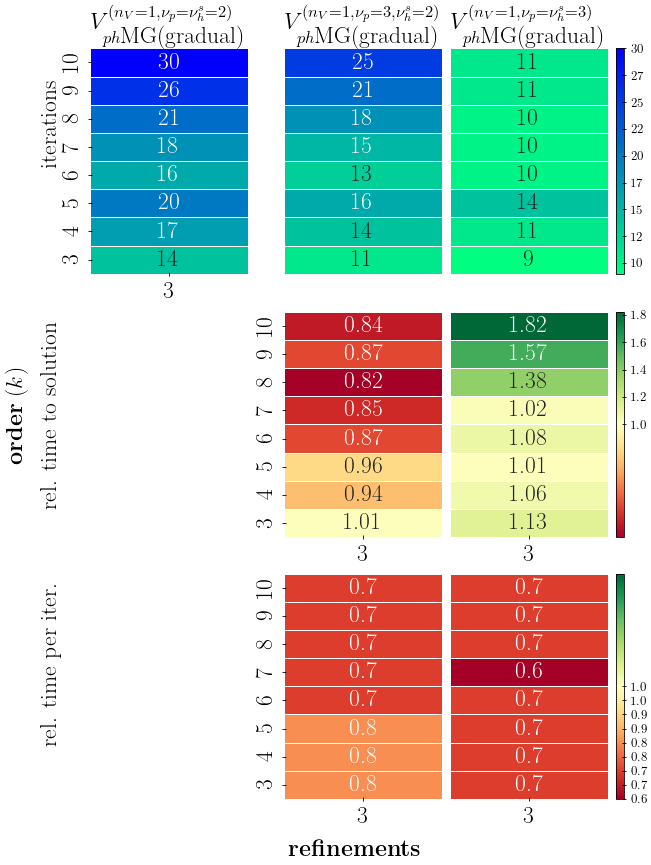

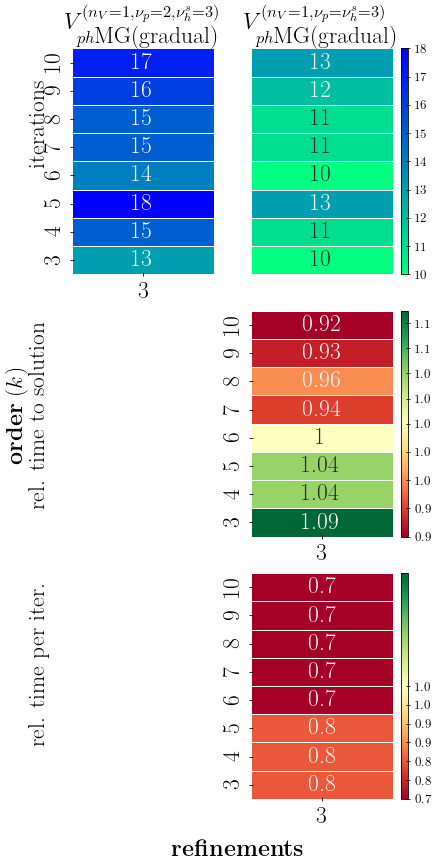

In [7]:
phmg_grad_data =  {}

for problem in problems:
    print(f"{problem}===================================================")
    phmg_data =  {}

    for h_cycles in range(1,2):
        for p_sweeps, h_sweeps in [(2,2), (2,3), (3,2), 
                                   (3,3), #(3,4), (4,3), (4,4)
                                  ]:
            # uses smoother p-coarsening for k=9,10
            #path    = f'{pream}/phmg_grad_rerun/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'
            path    = f'{pream}/phmg_grad_fixed_coarsen/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'

            try:
                phmg = get_frame(f'{path}')
            except:
                continue
            phmg = phmg[phmg['order'] != 2]
            phmg = phmg.reset_index(drop=True)
            if (phmg['linear_iter'] == 120).any():
                continue

            if p_sweeps == h_sweeps:
                phmg_data[r'$V^{%s}_{ph\textnormal{MG(gradual)}}$' % rf'(n_V={h_cycles},\nu_p=\nu_h^s={p_sweeps})'] = phmg
            else:
                phmg_data[r'$V^{%s}_{ph\textnormal{MG(gradual)}}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h^s={h_sweeps})'] = phmg

    # for h_cycles in range(1,3):
    #     for p_sweeps, h_sweeps in [(2,2), (2,3), (3,2), 
    #                                (3,3), #(3,4), (4,3), (4,4)
    #                               ]:
    #         path    = f'{pream}/phmg_grad_onesided/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'
    #         phmg = get_frame(f'{path}')
    #         phmg = phmg[phmg['order'] != 2]
    #         phmg = phmg.reset_index(drop=True)
    #         if (phmg['linear_iter'] == 120).any():
    #             continue

    #         phmg_data[r'$V^{%s}_{phmg(gradual)}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h^D={2*h_sweeps})'] = phmg
    
    plot_all(phmg_data, warm=True)
    phmg_grad_data[problem] = phmg_data


# All data

In [8]:
#problem = 'bfs2d'

best_fbf_hmg   = [r'FBF$\left(V^{\left(\nu_h^s=3\right)}_{h\textnormal{MG}}\right)$']
best_fbf_phmg  = [r'FBF$\left(V^{\left(n_V=1,\nu_p=\nu_h^s=2\right)}_{ph\textnormal{MG}\left(\textnormal{direct}\right)}\right)$']
best_phmg      = [r'$V^{(n_V=2,\nu_p=2,\nu_h^s=3)}_{ph\textnormal{MG(direct)}}$',
                  r'$V^{(n_V=2,\nu_p=\nu_h^s=2)}_{ph\textnormal{MG(direct)}}$']
best_phmg_grad = [r'$V^{(n_V=1,\nu_p=\nu_h^s=3)}_{ph\textnormal{MG(gradual)}}$', 
                  r'$V^{(n_V=1,\nu_p=2,\nu_h^s=3)}_{ph\textnormal{MG(gradual)}}$', ]

combined_data = {}
for problem in ['ldc2d', 'bfs2d']:
    pdf_pream = f"sv_{problem}" 
    print(f"{pdf_pream}===================================================")
    data = {}
    
    for idata, grab in zip( # data
                            [afbf_hmg_data[problem],    afbf_direct_data[problem], 
                            phmg_direct_data[problem],  phmg_direct_data[problem],  
                            phmg_grad_data[problem],    phmg_grad_data[problem]],
                            # names
                            best_fbf_hmg + best_fbf_phmg +  best_phmg + best_phmg_grad
                        ):
        for k,v in idata.items():
            if grab in k:
                data[k] = v


    #plot_all(data, save_name=f"sv_{problem}", warm=False)
    combined_data[problem] = data

sv_ldc2d===================================================
sv_bfs2d===================================================


/Users/alexey/papers/paper-phMG-stokes/data/plot_data/bar_table.py:226: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=2.0)


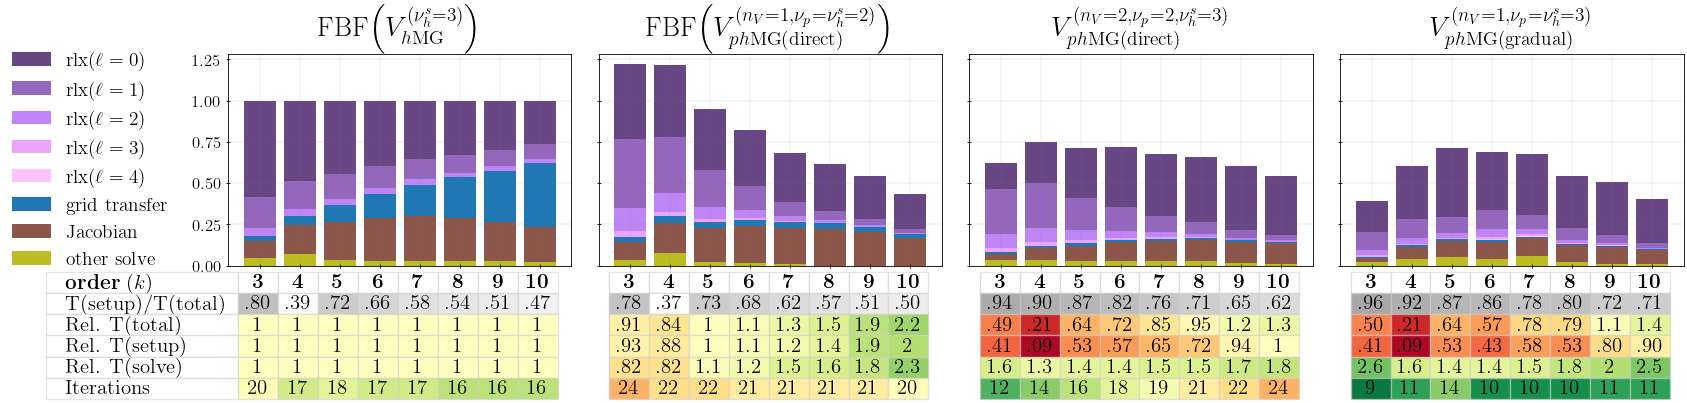

/Users/alexey/papers/paper-phMG-stokes/data/plot_data/bar_table.py:226: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=2.0)


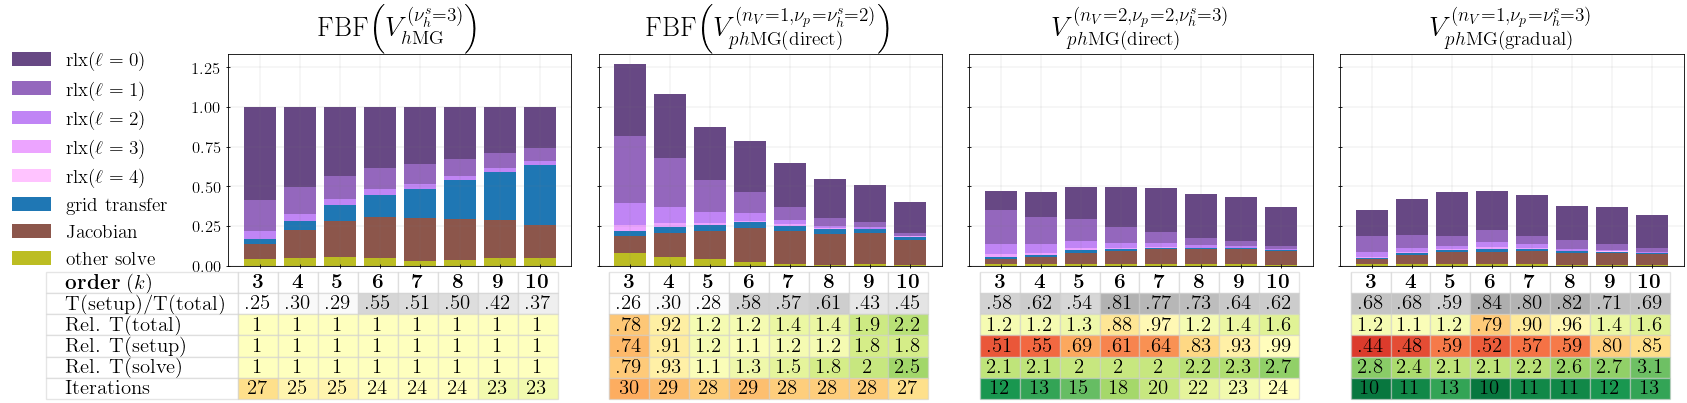

In [9]:
from bar_table import plot_fraction


ref = 3
names_all = best_fbf_hmg + best_fbf_phmg + best_phmg[:1]  + best_phmg_grad[:1]

for msh_type, data in combined_data.items():
    data_dict = {}
    for name in names_all:
        tmp = data[name]
        data_dict[name] = tmp[tmp['ref'] == ref]
        data_dict[name] = data_dict[name].reset_index(drop=True)
    
    tmp = plot_fraction(data_dict, f"sv_{msh_type}_ref{ref}",  th_disc=False)